Rows, Columns: (1000, 7)

Data Types:
Transaction_ID      int64
Date               object
Customer_ID        object
Product            object
Quantity            int64
Price_Per_Unit    float64
Total_Sale          int64
dtype: object

Descriptive Statistics:
       Transaction_ID     Quantity  Price_Per_Unit   Total_Sale
count     1000.000000  1000.000000     1000.000000  1000.000000
mean       500.500000     2.507000      781.947368  1989.393000
std        288.819436     1.135447      410.404897  1507.545674
min          1.000000     1.000000      299.000000   299.000000
25%        250.750000     1.000000      499.000000   897.000000
50%        500.500000     3.000000      699.000000  1497.000000
75%        750.250000     4.000000      999.000000  2796.000000
max       1000.000000     4.000000     1499.000000  5996.000000

Missing Values:
Transaction_ID    0
Date              0
Customer_ID       0
Product           0
Quantity          0
Price_Per_Unit    0
Total_Sale        0
dtype: i

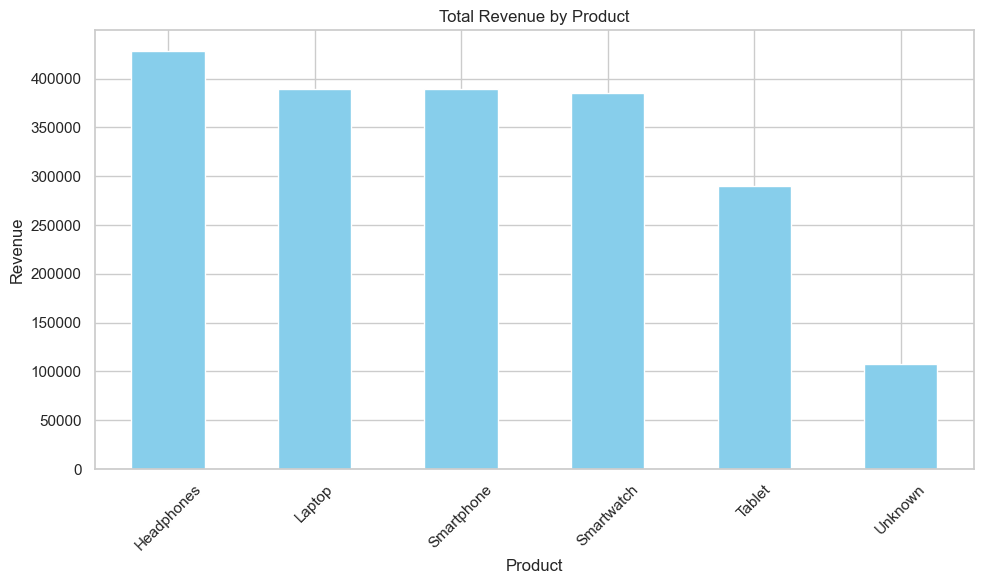

Customer_ID
Unknown    102471
2636        14788
1038         9992
4741         8994
2333         8994
4294         8993
3263         8792
1592         8493
4415         7495
4597         7495
Name: Total_Sale, dtype: int64


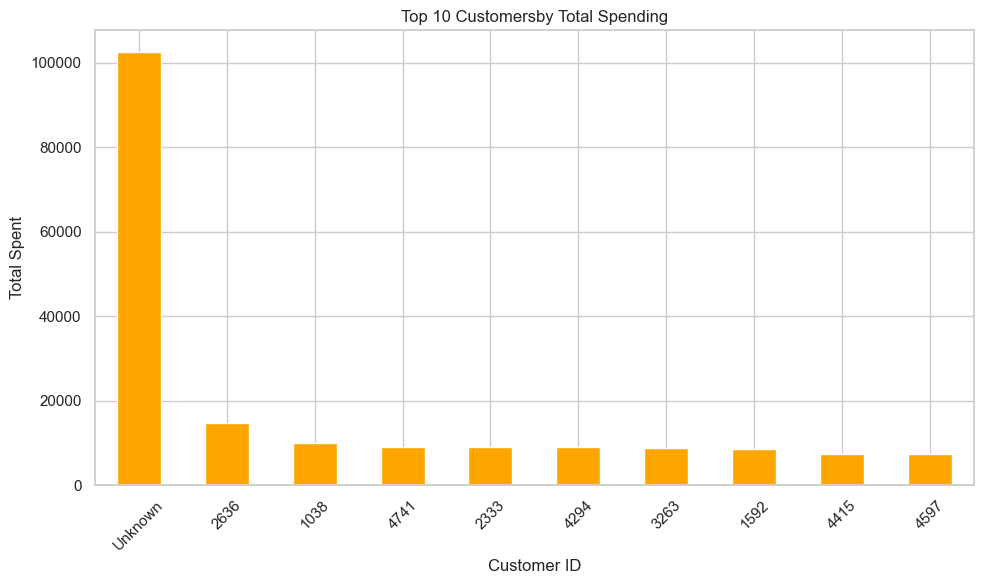

C:\Users\bayod\AppData\Local\Temp\ipykernel_21720\1476515476.py:59: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"])


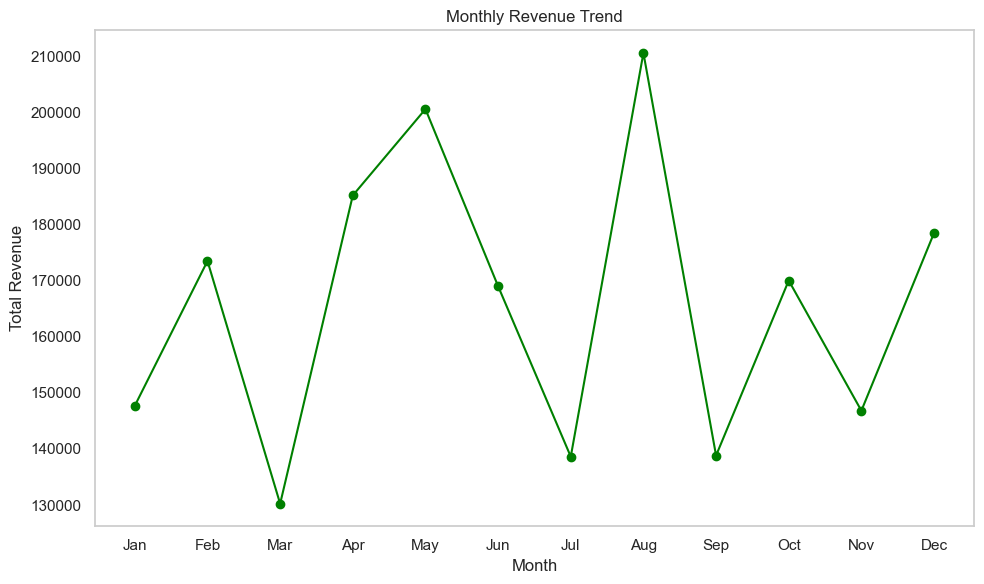

C:\Users\bayod\AppData\Local\Temp\ipykernel_21720\1476515476.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_quantity.values, y=top_quantity.index, palette="Blues")


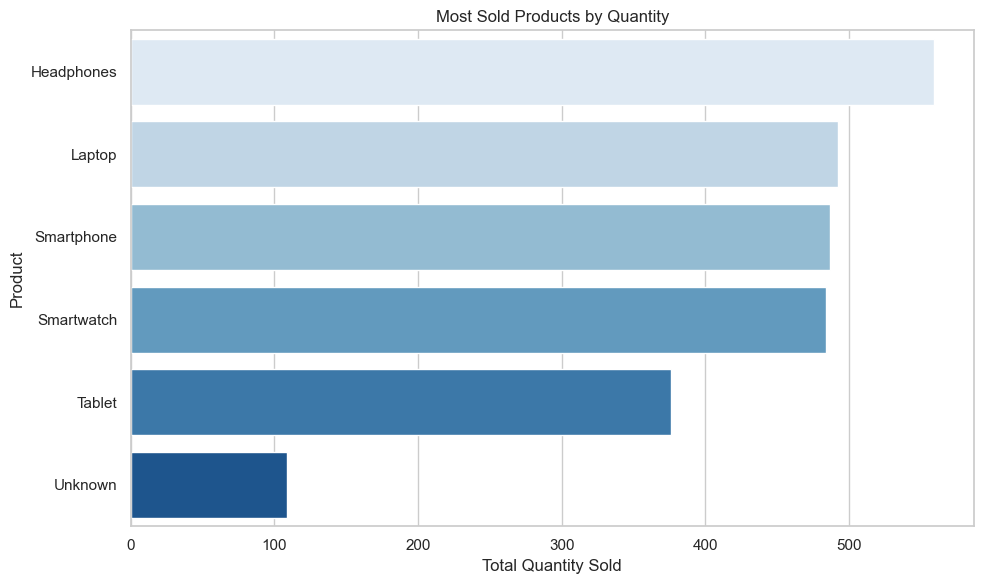

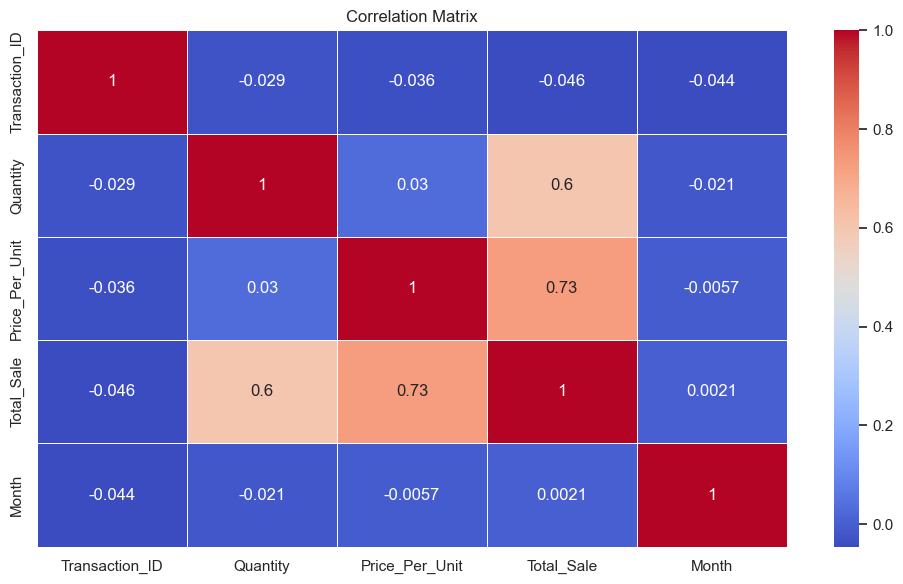

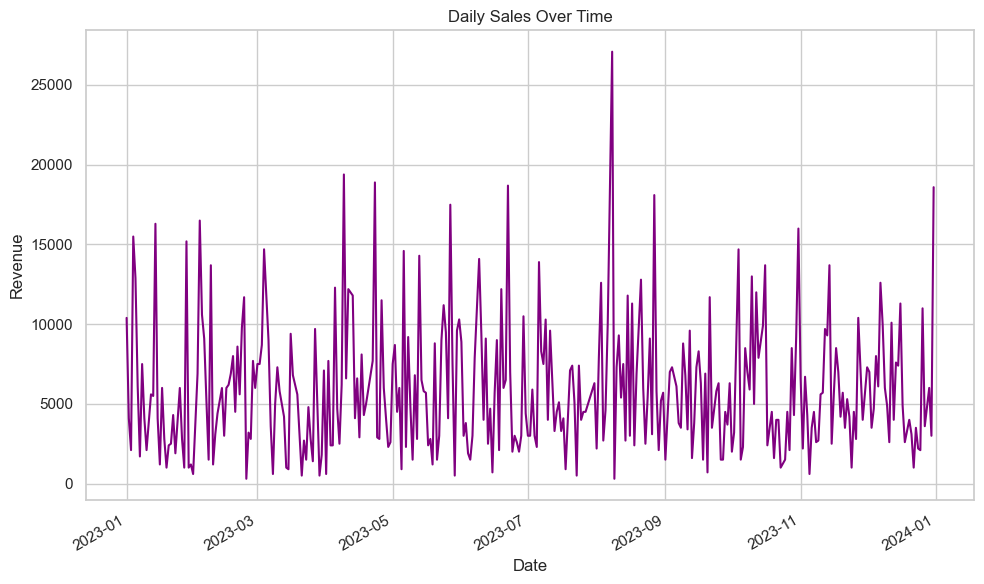

In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Set visual styles for beter plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Load clean data
df = pd.read_csv(r"C:\Users\bayod\OneDrive\Desktop\bootcamps\LearningWithAI\Python\Jupyter\ecommerce_sales_data_cleaned.csv", encoding='utf-8')

#confirm loading
df.head()

#shape of the dataset
print("Rows, Columns:", df.shape)
#column types
print("\nData Types:")
print(df.dtypes)
#summary of numeric columns
print("\nDescriptive Statistics:")
print(df.describe())
#check for missing values again
print("\nMissing Values:")
print(df.isnull().sum())

#Analyse sales by product: what products are generating the most revenue?
product_sales = df.groupby("Product") ["Total_Sale"].sum().sort_values(ascending=False)

#Display results
print(product_sales)

#visualise
product_sales.plot(kind="bar", color="skyblue")
plt.title("Total Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Top 10 customers by spending -- Who are the highest value customers
top_customers = df.groupby("Customer_ID") ["Total_Sale"].sum().sort_values(ascending=False).head(10)
#Display results
print(top_customers)

#visualise
top_customers.plot(kind="bar", color="orange")
plt.title("Top 10 Customersby Total Spending")
plt.xlabel("Customer ID")
plt.ylabel("Total Spent")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Monthly sales trends: how much do we sell each month?
#Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])

#Extract month
df["Month"] = df["Date"].dt.month
monthly_sales = df.groupby("Month") ["Total_Sale"].sum()

#visualise
monthly_sales.plot(kind="line", marker="o", color="green")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(ticks=range(1,13), labels=[ "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(False)
plt.tight_layout()
plt.show()


#Most Frequently Sold Produccts: what products sell the most in quantity?
top_quantity = df.groupby("Product") ["Quantity"].sum().sort_values(ascending=False)

#visualise
sns.barplot(x=top_quantity.values, y=top_quantity.index, palette="Blues")
plt.title("Most Sold Products by Quantity")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

#compute correlation -- are there relationshps betweeen numeric columns?
numeric_df = df.select_dtypes(include=["number"])
correlation = numeric_df.corr()

#visualise with a heatmap
sns.heatmap(correlation, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

#Daily Sales trend -- what are our daily sales like?
daily_sales  = df.groupby("Date") ["Total_Sale"].sum()

daily_sales.plot(kind="line", color="purple")
plt.title("Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()